In [1]:
import numpy as np
import pandas as pd

In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hier
from scipy.spatial import distance as ssd

In [4]:
df = pd.read_csv("designed_molecules.smi", sep=" ", names=["Smiles", "Name"])
df

,Smiles,Name
0,c1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccccc3,ZINC000015828584
1,FCc1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccc(C)cc3,ZINC00001
2,COc1ccc(cc1OC)C[N@H+](CCC[NH3+])CC[C@@]2(c3ccc...,ZINC000015162196
3,n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+]...,ZINC000012308844
4,n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+]...,ZINC00002
5,C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2,ZINC000008377044
6,C[NH2+]C[C@H](C(=O)CC)C[NH2+]Cc1ccc(c(c1)OC)OC...,ZINC000003
7,COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)C...,ZINC000011878175
8,COc1ccc(cc1)CC[N@@H+]2[C@@H](COCN)CC[C@@H](C2)...,ZINC00004
9,C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2,ZINC000008373857


In [5]:
smiles_list = df["Smiles"].tolist()
smiles_list

['c1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccccc3',
 'FCc1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccc(C)cc3',
 'COc1ccc(cc1OC)C[N@H+](CCC[NH3+])CC[C@@]2(c3ccccc3)C[C@@H](C)[N@H+](C)C[C@@H]2C',
 'n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+](CC2)C(C3)Cc(c34)cccc4',
 'n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+](CC2)[C@@H](C3)Cc(c34)c(ccc4)NCCC',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2',
 'C[NH2+]C[C@H](C(=O)CC)C[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2',
 'COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)Cc3cccc(c3)-n4cccn4',
 'COc1ccc(cc1)CC[N@@H+]2[C@@H](COCN)CC[C@@H](C2)C[N@H+](C)Cc3cccc(c3)-n4cccn4',
 'C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2']

In [6]:
names_list = df["Name"].tolist()
names_list

['ZINC000015828584',
 'ZINC00001',
 'ZINC000015162196',
 'ZINC000012308844',
 'ZINC00002',
 'ZINC000008377044',
 'ZINC000003',
 'ZINC000011878175',
 'ZINC00004',
 'ZINC000008373857']

In [7]:
mol_list = []
fp_list = []
for i, j in zip(names_list, smiles_list):
    mol = Chem.MolFromSmiles(j)
    fps = Chem.RDKFingerprint(mol)
    mol_list.append(mol)
    fp_list.append(fps)

In [8]:
num_of_mol = len(fp_list)
num_of_mol

10

In [10]:
hmap = np.empty(shape=(num_of_mol, num_of_mol))
hmap

array([[6.92652849e-310, 4.64623331e-310, 4.64623331e-310,
        4.64623331e-310, 2.37151510e-322, 2.37151510e-322,
        4.64623331e-310, 1.69759663e-313, 5.09278990e-313,
        4.64610978e-310],
       [4.64623330e-310, 4.27366784e-321, 4.64623330e-310,
        6.92652849e-310, 1.58101007e-322, 2.37151510e-322,
        4.64623331e-310, 4.64623331e-310, 4.64623331e-310,
        4.64623331e-310],
       [3.95252517e-322, 2.37151510e-322, 4.64623331e-310,
        1.69759663e-313, 5.09278990e-313, 4.64610978e-310,
        1.10670705e-321, 3.64126381e-321, 4.64623330e-310,
        6.92652849e-310],
       [4.64623331e-310, 4.64623331e-310, 4.64623331e-310,
        1.63041663e-322, 4.64623331e-310, 4.64623331e-310,
        3.95252517e-322, 2.37151510e-322, 4.64623331e-310,
        4.64623331e-310],
       [4.64623331e-310, 4.64623331e-310, 6.32404027e-322,
        2.37151510e-322, 4.64623331e-310, 1.69759663e-313,
        2.12199579e-313, 5.43472210e-323, 4.64623330e-310,
        2.7

In [11]:
for m,fpsi in enumerate(fp_list):
    for n,fpsj in enumerate(fp_list):
        tc = DataStructs.TanimotoSimilarity(fpsj, fpsi)
        hmap[m, n] = tc
hmap

array([[1.        , 0.80749747, 0.25396825, 0.24932493, 0.2905297 ,
        0.18780252, 0.20664207, 0.22569738, 0.24980237, 0.18983701],
       [0.80749747, 1.        , 0.27238525, 0.26645265, 0.32889874,
        0.19175778, 0.21590909, 0.24148372, 0.26953405, 0.19349458],
       [0.25396825, 0.27238525, 1.        , 0.33919338, 0.34070796,
        0.42283563, 0.4516129 , 0.39609053, 0.43490839, 0.4278607 ],
       [0.24932493, 0.26645265, 0.33919338, 1.        , 0.72872996,
        0.19415205, 0.23681257, 0.34341253, 0.34803922, 0.19791667],
       [0.2905297 , 0.32889874, 0.34070796, 0.72872996, 1.        ,
        0.19672131, 0.23666978, 0.32728921, 0.34372367, 0.20441459],
       [0.18780252, 0.19175778, 0.42283563, 0.19415205, 0.19672131,
        1.        , 0.84148728, 0.29545455, 0.27253669, 0.82845188],
       [0.20664207, 0.21590909, 0.4516129 , 0.23681257, 0.23666978,
        0.84148728, 1.        , 0.35034803, 0.32277835, 0.70840787],
       [0.22569738, 0.24148372, 0.3960905

In [12]:
hmap1 = 1-hmap
hmap1

array([[0.        , 0.19250253, 0.74603175, 0.75067507, 0.7094703 ,
        0.81219748, 0.79335793, 0.77430262, 0.75019763, 0.81016299],
       [0.19250253, 0.        , 0.72761475, 0.73354735, 0.67110126,
        0.80824222, 0.78409091, 0.75851628, 0.73046595, 0.80650542],
       [0.74603175, 0.72761475, 0.        , 0.66080662, 0.65929204,
        0.57716437, 0.5483871 , 0.60390947, 0.56509161, 0.5721393 ],
       [0.75067507, 0.73354735, 0.66080662, 0.        , 0.27127004,
        0.80584795, 0.76318743, 0.65658747, 0.65196078, 0.80208333],
       [0.7094703 , 0.67110126, 0.65929204, 0.27127004, 0.        ,
        0.80327869, 0.76333022, 0.67271079, 0.65627633, 0.79558541],
       [0.81219748, 0.80824222, 0.57716437, 0.80584795, 0.80327869,
        0.        , 0.15851272, 0.70454545, 0.72746331, 0.17154812],
       [0.79335793, 0.78409091, 0.5483871 , 0.76318743, 0.76333022,
        0.15851272, 0.        , 0.64965197, 0.67722165, 0.29159213],
       [0.77430262, 0.75851628, 0.6039094

In [13]:
hmap1_array = ssd.squareform(hmap1)
hmap1_array

array([0.19250253, 0.74603175, 0.75067507, 0.7094703 , 0.81219748,
       0.79335793, 0.77430262, 0.75019763, 0.81016299, 0.72761475,
       0.73354735, 0.67110126, 0.80824222, 0.78409091, 0.75851628,
       0.73046595, 0.80650542, 0.66080662, 0.65929204, 0.57716437,
       0.5483871 , 0.60390947, 0.56509161, 0.5721393 , 0.27127004,
       0.80584795, 0.76318743, 0.65658747, 0.65196078, 0.80208333,
       0.80327869, 0.76333022, 0.67271079, 0.65627633, 0.79558541,
       0.15851272, 0.70454545, 0.72746331, 0.17154812, 0.64965197,
       0.67722165, 0.29159213, 0.16709184, 0.69249106, 0.71682341])

In [14]:
linked = hier.linkage(hmap1_array, 'single')
linked

array([[ 5.        ,  6.        ,  0.15851272,  2.        ],
       [ 7.        ,  8.        ,  0.16709184,  2.        ],
       [ 9.        , 10.        ,  0.17154812,  3.        ],
       [ 0.        ,  1.        ,  0.19250253,  2.        ],
       [ 3.        ,  4.        ,  0.27127004,  2.        ],
       [ 2.        , 12.        ,  0.5483871 ,  4.        ],
       [11.        , 15.        ,  0.56509161,  6.        ],
       [14.        , 16.        ,  0.65196078,  8.        ],
       [13.        , 17.        ,  0.67110126, 10.        ]])

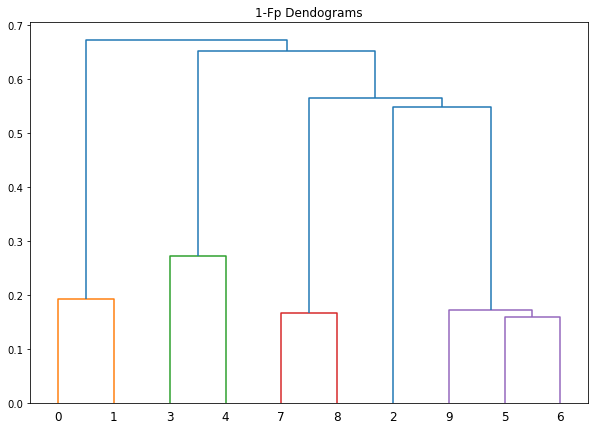

In [15]:
plt.figure(figsize=(10, 7))
plt.title("1-Fp Dendograms")
dend = hier.dendrogram(linked)
plt.show()

In [24]:
def assign_clusters(linked_matrix, num_clusters):
    assignments = hier.fcluster(linked_matrix, t=num_clusters, criterion='maxclust')
    clusters = [[] for x in range(num_clusters)]
    for i,cc in enumerate(assignments):
        clusters[cc-1].append(i)
    return clusters

def tc_intercluster(clust_list, cutoff=0.7):
    btc = False
    for cluster in clust_list:
        if len(cluster) > 1:
            for i in cluster:
                for j in cluster:
                    tc = hmap[i, j]
                    if tc < 0.7:
                        btc = True
                    
    if btc:
        return False
    else:
        return True

In [25]:
nclusters = 2
final_nclusters = False
while final_nclusters == False:
    clusters = assign_clusters(linked, nclusters)
    final_nclusters = tc_intercluster(clusters, cutoff=0.7)
    if final_nclusters == False:
        nclusters += 1
print(f'The final number of clusters is {nclusters}')


The final number of clusters is 5


In [27]:
assignments = hier.fcluster(linked, t=5, criterion='maxclust')
assignments

array([1, 1, 5, 2, 2, 4, 4, 3, 3, 4], dtype=int32)

In [29]:
assignments1 = assignments - 1
assignments1

array([0, 0, 4, 1, 1, 3, 3, 2, 2, 3], dtype=int32)

In [21]:
clusters = assign_clusters(linked, 5)
clusters

[[0, 1], [3, 4], [7, 8], [5, 6, 9], [2]]

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
sil_score = silhouette_score(hmap1, labels=assignments, metric='precomputed')
sil_score

0.5962721315117546